# 游戏玩家付费金额预测大赛
## 一、相关描述

【任务】根据玩家在前7日的行为数据，预测玩家前45日付费金额

【数据】

1）	训练集（带标签）：2288007个样本 带标签的训练集中共有2288007个样本。tap_fun_train.csv中存有训练集样本的全部信息，user_id为样本的id，prediction_pay_price为训练集标签，其他字段为特征 

2）	测试集：828934个样本 tap_fun_test.csv中存有测试集的特征信息，除无prediction_pay_price字段外，格式同tap_fun_train.csv。参赛者的目标是尽可能准确地预测第45天的消费金额prediction_pay_price 

3） tap4fun 数据字段解释.xlsx 为本次比赛数据109个字段的解释，每个属性对应的数据均用“数值”表示，无空值

【主要字段解释】

自变量

user_id	玩家唯一ID；register_time 玩家注册时间；avg_online_minutes 在线时长；pay_price 前七日付费金额；pay_count 前七日付费次数

因变量

prediction_pay_price 前45日付费金额

【参赛链接】

http://www.dcjingsai.com/common/cmpt/%E6%B8%B8%E6%88%8F%E7%8E%A9%E5%AE%B6%E4%BB%98%E8%B4%B9%E9%87%91%E9%A2%9D%E9%A2%84%E6%B5%8B%E5%A4%A7%E8%B5%9B_%E8%B5%9B%E4%BD%93%E4%B8%8E%E6%95%B0%E6%8D%AE.html

## 二、熟悉数据
### 1. 提取数据

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('/Users/cy_ariel/Desktop/tap4fun竞赛数据/tap_fun_train.csv')
test = pd.read_csv('/Users/cy_ariel/Desktop/tap4fun竞赛数据/tap_fun_test.csv')
print('train shape is:')
print(train.shape)
print('test shape is:')
print(test.shape)

train shape is:
(2288007, 109)
test shape is:
(828934, 108)


数据量很大，有一百多个变量

### 2. pay_price

#### 1）前七天有付费行为train_pay_7

In [3]:
train_pay_7 = train[train['pay_price']>0]
print('train_pay_7 shape is:')
print(train_pay_7.shape)

train_pay_7 shape is:
(41439, 109)


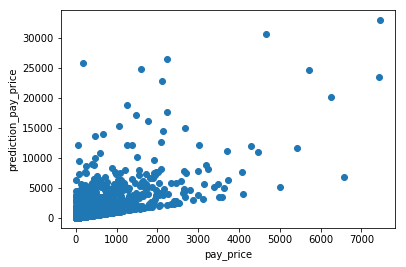

In [4]:
#pay_price与prediction_pay_price散点图
plt.scatter(train_pay_7['pay_price'],train_pay_7['prediction_pay_price'])
plt.xlabel("pay_price")
plt.ylabel("prediction_pay_price")
plt.show()

In [5]:
train_pay_7['pay_price'].describe()

count    41439.000000
mean        29.521143
std        165.655561
min          0.990000
25%          0.990000
50%          1.990000
75%         11.970000
max       7457.950000
Name: pay_price, dtype: float64

In [6]:
train_pay_7['prediction_pay_price'].describe()

count    41439.000000
mean        94.522940
std        645.678279
min          0.990000
25%          0.990000
50%          3.970000
75%         21.950000
max      32977.810000
Name: prediction_pay_price, dtype: float64

上面可以看出有很大一部分用户付费0.99，估计是有什么活动0.99可以送很多东西？付款最多的用户，45天付了3万多块钱？真土豪

#### 2）前七天付费后面不继续付费train_pay_7_nopay_45

In [8]:
train_pay_7_nopay_45 = train_pay_7[train_pay_7['prediction_pay_price']==train_pay_7['pay_price']]
print('train_pay_7_nopay_45 shape is:')
print(train_pay_7_nopay_45.shape)

train_pay_7_nopay_45 shape is:
(30130, 109)


In [9]:
train_pay_7_nopay_45['pay_price'].describe()

count    30130.000000
mean        11.407407
std         71.134875
min          0.990000
25%          0.990000
50%          1.980000
75%          5.980000
max       4086.520000
Name: pay_price, dtype: float64

#### 3）前7天付费后面继续付费train_pay_7_pay_45

In [10]:
train_pay_7_pay_45 = train_pay_7[train_pay_7['prediction_pay_price']>train_pay_7['pay_price']]
print('train_pay_7_pay_45 shape is:')
print(train_pay_7_pay_45.shape)

train_pay_7_pay_45 shape is:
(11309, 109)


In [11]:
train_pay_7_pay_45['pay_price'].describe()

count    11309.000000
mean        77.780661
std        289.610458
min          0.990000
25%          2.980000
50%         15.970000
75%         45.940000
max       7457.950000
Name: pay_price, dtype: float64

In [12]:
train_pay_7_pay_45['prediction_pay_price'].describe()

count    11309.000000
mean       315.963475
std       1202.828424
min          1.980000
25%         16.940000
50%         48.920000
75%        163.760000
max      32977.810000
Name: prediction_pay_price, dtype: float64

#### 4）前7天未付费玩家train_nopay_7

In [13]:
train_nopay_7 = train[train['pay_price']==0]
print('train_nopay_7 shape is:')
print(train_nopay_7.shape)

train_nopay_7 shape is:
(2246568, 109)


In [14]:
train_nopay_7_pay_45 = train_nopay_7[train_nopay_7['prediction_pay_price']>0]
print('train_nopay_7_pay_45 shape is:')
print(train_nopay_7_pay_45.shape)

train_nopay_7_pay_45 shape is:
(4549, 109)


In [15]:
train_nopay_7['prediction_pay_price'].describe()

count    2.246568e+06
mean     8.270126e-02
std      1.089864e+01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      6.752970e+03
Name: prediction_pay_price, dtype: float64

上面其实将用户分为了几类，前7天付费的、前7天未付费的；前7天付费又可分为后面继续付费和后面不再付费；前7天未付费的又可进一步分为后面一直未付费和后面付费的。下面总结一下这些用户的占比及付费情况：

#### 5）前7天付费用户及未付费用户占比情况

In [16]:
train_pay_7_shape = train_pay_7.shape[0]
train_nopay_7_shape = train_nopay_7.shape[0]
train_shape = train.shape[0]
train_pay_7_num_rate = train_pay_7_shape/train_shape
train_pay_7_num_rate = "%.0f%%" % (train_pay_7_num_rate * 100)
train_nopay_7_num_rate = train_nopay_7_shape/train_shape
train_nopay_7_num_rate = "%.0f%%" % (train_nopay_7_num_rate * 100)

train_pay_7_pre = round(train_pay_7['prediction_pay_price'].sum())
train_nopay_7_pre = round(train_nopay_7['prediction_pay_price'].sum())
train_pre = round(train['prediction_pay_price'].sum())
train_pay_7_pre_rate = train_pay_7_pre/train_pre
train_pay_7_pre_rate = "%.0f%%" % (train_pay_7_pre_rate * 100)
train_nopay_7_pre_rate = train_nopay_7_pre/train_pre
train_nopay_7_pre_rate = "%.0f%%" % (train_nopay_7_pre_rate * 100)
data = {'user_num':{'train_pay_7':train_pay_7_shape,'train_nopay_7':train_nopay_7_shape,'train':train_shape},
        'num_rate':{'train_pay_7':train_pay_7_num_rate,'train_nopay_7':train_nopay_7_num_rate,'train':1},
        'pre_pay':{'train_pay_7':train_pay_7_pre,'train_nopay_7':train_nopay_7_pre,'train':train_pre},
        'pre_rate':{'train_pay_7':train_pay_7_pre_rate,'train_nopay_7':train_nopay_7_pre_rate,'train':1},
       }
df = pd.DataFrame(data,columns=['user_num','num_rate','pre_pay','pre_rate'])
df.sort_values(by="user_num")

,user_num,num_rate,pre_pay,pre_rate
train_pay_7,41439,2%,3916936.0,95%
train_nopay_7,2246568,98%,185794.0,5%
train,2288007,1,4102730.0,1


上面可以看出前7天付费的用户只占总用户的2%，但是其付款总数占总付款数的95%！潜力巨大的一群人啊，付费核心人群

#### 6）前7天付费用户细分及占比情况

In [17]:
train_pay_7_pay_45_shape = train_pay_7_pay_45.shape[0]
train_pay_7_nopay_45_shape = train_pay_7_nopay_45.shape[0]
train_pay_7_pay_45_rate = train_pay_7_pay_45_shape/train_pay_7_shape
train_pay_7_pay_45_rate = "%.0f%%" % (train_pay_7_pay_45_rate * 100)
train_pay_7_nopay_45_rate = train_pay_7_nopay_45_shape/train_pay_7_shape
train_pay_7_nopay_45_rate = "%.0f%%" % (train_pay_7_nopay_45_rate * 100)

train_pay_7_pay_45_pay = round(train_pay_7_pay_45['pay_price'].sum())
train_pay_7_nopay_45_pay = round(train_pay_7_nopay_45['pay_price'].sum())
train_pay_7_pay = train_pay_7['pay_price'].sum()
train_pay_7_pay_45_pay_rate = train_pay_7_pay_45_pay/train_pay_7_pay
train_pay_7_pay_45_pay_rate = "%.0f%%" % (train_pay_7_pay_45_pay_rate * 100)
train_pay_7_nopay_45_pay_rate = train_pay_7_nopay_45_pay/train_pay_7_pay
train_pay_7_nopay_45_pay_rate = "%.0f%%" % (train_pay_7_nopay_45_pay_rate * 100)


train_pay_7_pay_45_pre = round(train_pay_7_pay_45['prediction_pay_price'].sum())
train_pay_7_nopay_45_pre = round(train_pay_7_nopay_45['prediction_pay_price'].sum())
train_pay_7_pay_45_pre_rate = train_pay_7_pay_45_pre/train_pay_7_pre
train_pay_7_pay_45_pre_rate = "%.0f%%" % (train_pay_7_pay_45_pre_rate * 100)
train_pay_7_nopay_45_pre_rate = train_pay_7_nopay_45_pre/train_pay_7_pre
train_pay_7_nopay_45_pre_rate = "%.0f%%" % (train_pay_7_nopay_45_pre_rate * 100)


data = {'user_num':{'train_pay_7_pay_45':train_pay_7_pay_45_shape,'train_pay_7_nopay_45':train_pay_7_nopay_45_shape,'train_pay_7':train_pay_7_shape},
        'num_rate':{'train_pay_7_pay_45':train_pay_7_pay_45_rate,'train_pay_7_nopay_45':train_pay_7_nopay_45_rate,'train_pay_7':1},
        'pay_price':{'train_pay_7_pay_45':train_pay_7_pay_45_pay,'train_pay_7_nopay_45':train_pay_7_nopay_45_pay,'train_pay_7':train_pay_7_pay},
        'pay_rate':{'train_pay_7_pay_45':train_pay_7_pay_45_pay_rate,'train_pay_7_nopay_45':train_pay_7_nopay_45_pay_rate,'train_pay_7':1},
        'pre_pay':{'train_pay_7_pay_45':train_pay_7_pay_45_pre,'train_pay_7_nopay_45':train_pay_7_nopay_45_pre,'train_pay_7':train_pay_7_pre},
        'pre_rate':{'train_pay_7_pay_45':train_pay_7_pay_45_pre_rate,'train_pay_7_nopay_45':train_pay_7_nopay_45_pre_rate,'train_pay_7':1},
       }
df = pd.DataFrame(data,columns=['user_num','num_rate','pay_price','pay_rate','pre_pay','pre_rate'])
df.sort_values(by="user_num")

,user_num,num_rate,pay_price,pay_rate,pre_pay,pre_rate
train_pay_7_pay_45,11309,27%,879621.00,72%,3573231.0,91%
train_pay_7_nopay_45,30130,73%,343705.00,28%,343705.0,9%
train_pay_7,41439,1,1223326.66,1,3916936.0,1


上面可以看出只有27%的人会继续付款，但是付款总数占前7天付费用户付款总数的91%！前7天付费后面继续付费的用户是重中之中有木有！

![image.png](https://github.com/cyariel/pay_price/blob/master/fig/1.png)

【总结】
1. 选出前7天付费用户
2. 对前7天用户分类，分成后面继续付费和后面不再付费两部分
3. 对继续付费的部分进行回归，得到这部分人的总付费
4. 前7天未付费的部分由于很少可以考虑放弃

### 3. avg_online_minutes分析

In [18]:
#查看是否有缺失值
train_pay_7['avg_online_minutes'].count()!=train_pay_7.shape[0]

False

/Users/cy_ariel/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


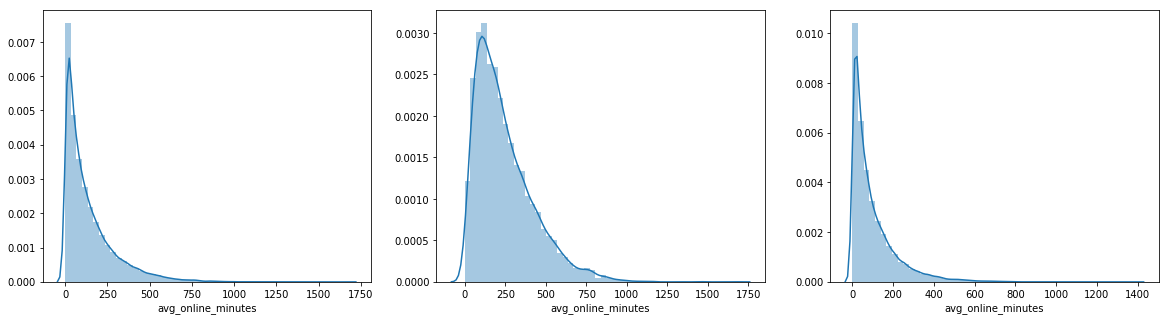

In [19]:
fig, (axis1,axis2,axis3) = plt.subplots(1,3,figsize=(20,5))
sns.distplot(train_pay_7['avg_online_minutes'],ax=axis1)
sns.distplot(train_pay_7_pay_45['avg_online_minutes'],ax=axis2)
sns.distplot(train_pay_7_nopay_45['avg_online_minutes'],ax=axis3)
plt.show()

In [20]:
train_pay_7['avg_online_minutes'][train_pay_7['avg_online_minutes']<10].count()

3169

In [21]:
train_pay_7_pay_45['avg_online_minutes'][train_pay_7_pay_45['avg_online_minutes']<10].count()

59

In [22]:
train_pay_7_nopay_45['avg_online_minutes'][train_pay_7_nopay_45['avg_online_minutes']<10].count()

3110

In [23]:
train_pay_7['avg_online_minutes'].describe()

count    41439.000000
mean       140.187746
std        149.972913
min          0.000000
25%         33.000000
50%         88.833333
75%        194.666667
max       1674.666667
Name: avg_online_minutes, dtype: float64

In [24]:
train_pay_7_pay_45['avg_online_minutes'].describe()

count    11309.000000
mean       245.507826
std        180.424647
min          0.666667
25%        109.666667
50%        200.500000
75%        339.833333
max       1674.666667
Name: avg_online_minutes, dtype: float64

In [25]:
train_pay_7_nopay_45['avg_online_minutes'].describe()

count    30130.000000
mean       100.656887
std        113.974528
min          0.000000
25%         23.333333
50%         61.166667
75%        137.166667
max       1394.666667
Name: avg_online_minutes, dtype: float64

上图看出在线时长是影响是否继续付费的重要变量

### 4. pay_count分析

In [26]:
train_pay_7['pay_count'].count()==train_pay_7.shape[0]

True

In [27]:
train_pay_7['pay_count'].describe()

count    41439.000000
mean         3.186226
std          4.218311
min          1.000000
25%          1.000000
50%          2.000000
75%          4.000000
max        105.000000
Name: pay_count, dtype: float64

In [28]:
train_pay_7_pay_45['pay_count'].describe()

count    11309.000000
mean         5.707932
std          6.470337
min          1.000000
25%          2.000000
50%          4.000000
75%          7.000000
max        105.000000
Name: pay_count, dtype: float64

In [29]:
train_pay_7_nopay_45['pay_count'].describe()

count    30130.000000
mean         2.239728
std          2.340433
min          1.000000
25%          1.000000
50%          1.000000
75%          3.000000
max         54.000000
Name: pay_count, dtype: float64

In [30]:
train_pay_7_pay_45[train_pay_7_pay_45['pay_count']==1]['pay_count'].count()

2019

In [31]:
train_pay_7_nopay_45[train_pay_7_nopay_45['pay_count']==1]['pay_count'].count()

15603

In [32]:
train_pay_7[train_pay_7['pay_count']==1]['pay_count'].count()

17622

![image.png](https://github.com/cyariel/pay_price/blob/master/fig/2.png)

前7天只付款一次的用户中90%后面不再继续付费

### 5. register_time

In [34]:
#格式2018-02-02 19:47:15
train['register_time_month'] = train['register_time'].str[:7]
train['register_time_day'] = train['register_time'].str[6:10]
train_month_df = pd.DataFrame(train['register_time_month'].value_counts()).sort_index()
train_day_df = pd.DataFrame(train['register_time_day'].value_counts()).sort_index()

In [35]:
train_month_df

,register_time_month
2018-01,390420
2018-02,1632463
2018-03,265124


In [37]:
train_day_df.head()

,register_time_day
1-26,70250
1-27,70417
1-28,79227
1-29,63803
1-30,50201


In [38]:
from pyecharts import Line
line1 = Line('用户数统计-月')
line1.use_theme('dark')
line1.add('用户数',train_month_df.index,train_month_df['register_time_month'],mark_line=["average"], mark_point=["max", "min"])

ERROR:lml.utils:failed to import pyecharts_snapshot
Traceback (most recent call last):
  File "/Users/cy_ariel/anaconda3/lib/python3.7/site-packages/lml/utils.py", line 43, in do_import
    plugin_module = __import__(plugin_module_name)
ModuleNotFoundError: No module named 'pyecharts_snapshot'


![image.png](https://github.com/cyariel/pay_price/blob/master/fig/%E7%94%A8%E6%88%B7%E6%95%B0%E7%BB%9F%E8%AE%A1-%E6%9C%88.png)

In [39]:
line2 = Line('用户数统计-天')
line2.use_theme('dark')
line2.add('用户数',train_day_df.index,train_day_df['register_time_day'],mark_line=["average"], mark_point=["max", "min"])

![image.png](https://github.com/cyariel/pay_price/blob/master/fig/%E7%94%A8%E6%88%B7%E6%95%B0%E7%BB%9F%E8%AE%A1-%E5%A4%A9.png)

上面可以看出二月是一整个月的数据，一月三月数据都不全；2月19这天用户数远远大于其他天数，可能有活动？

In [40]:
temp = train[['register_time_day','prediction_pay_price','pay_price']].groupby('register_time_day',as_index=False).sum()
line3 = Line('用户数统计-日-金额')
line3.use_theme('dark')
line3.add('用户数',train_day_df.index,train_day_df['register_time_day'],mark_line=["average"])
line3.add('prediction_pay_price',temp['register_time_day'],temp['prediction_pay_price'],mark_line=["average"], mark_point=["max", "min"])
line3.add('pay_price',temp['register_time_day'],temp['pay_price'],mark_line=["average"])


![image.png](https://github.com/cyariel/pay_price/blob/master/fig/%E7%94%A8%E6%88%B7%E6%95%B0%E7%BB%9F%E8%AE%A1-%E6%97%A5-%E9%87%91%E9%A2%9D.png)

上面可以看出2月19的活动好像并没有起到什么效果，付款数并没有明显增加

### 6. 获取数与使用数之间的关系

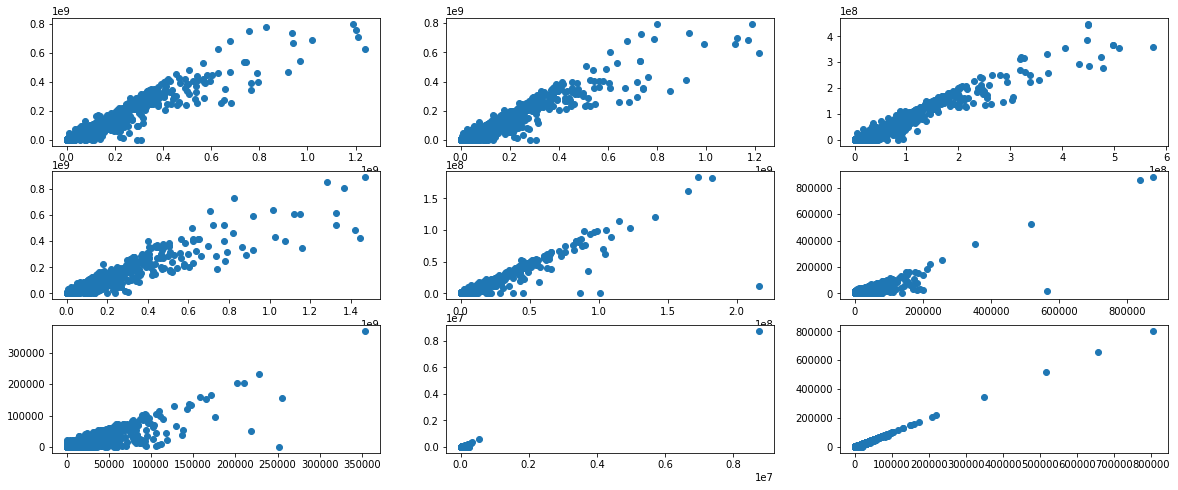

In [43]:
plt.figure(figsize=(20, 8))
plt.subplot(331)
plt.scatter(train_pay_7['wood_add_value'],train_pay_7['wood_reduce_value'])
plt.subplot(332)
plt.scatter(train_pay_7['stone_add_value'],train_pay_7['stone_reduce_value'])
plt.subplot(333)
plt.scatter(train_pay_7['ivory_add_value'],train_pay_7['ivory_reduce_value'])
plt.subplot(334)
plt.scatter(train_pay_7['meat_add_value'],train_pay_7['meat_reduce_value'])
plt.subplot(335)
plt.scatter(train_pay_7['magic_add_value'],train_pay_7['magic_reduce_value'])
plt.subplot(336)
plt.scatter(train_pay_7['infantry_add_value'],train_pay_7['infantry_reduce_value'])
plt.subplot(337)
plt.scatter(train_pay_7['cavalry_add_value'],train_pay_7['cavalry_reduce_value'])
plt.subplot(338)
plt.scatter(train_pay_7['shaman_add_value'],train_pay_7['shaman_reduce_value'])
plt.subplot(339)
plt.scatter(train_pay_7['wound_infantry_add_value'],train_pay_7['wound_infantry_reduce_value'])

从上面可以看出，获取数与使用数之间基本都存在线性关系

### 7. 游戏道具的等级之间的关系

/Users/cy_ariel/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


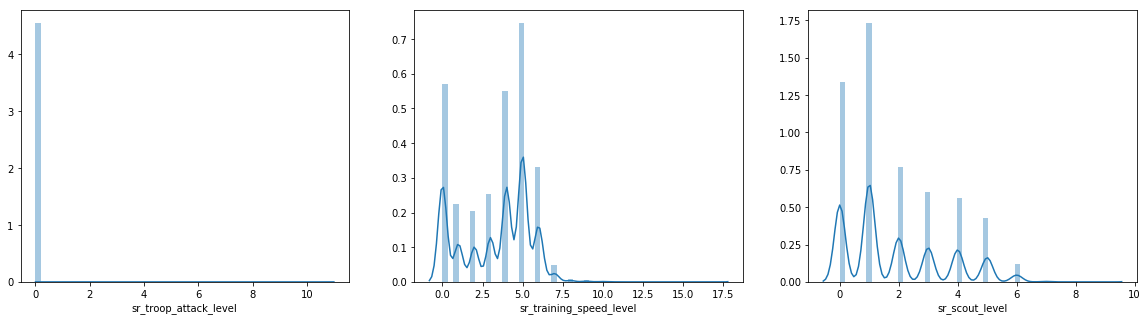

In [45]:
fig, (axis1,axis2,axis3) = plt.subplots(1,3,figsize=(20,5))
sns.distplot(train_pay_7['sr_troop_attack_level'],ax=axis1)
sns.distplot(train_pay_7['sr_training_speed_level'],ax=axis2)
sns.distplot(train_pay_7['sr_scout_level'],ax=axis3)
plt.show()

由于各个变量划分的等级也不一样，所以暂时没有看出明显的关系

### 8. PVP、PVE相关变量

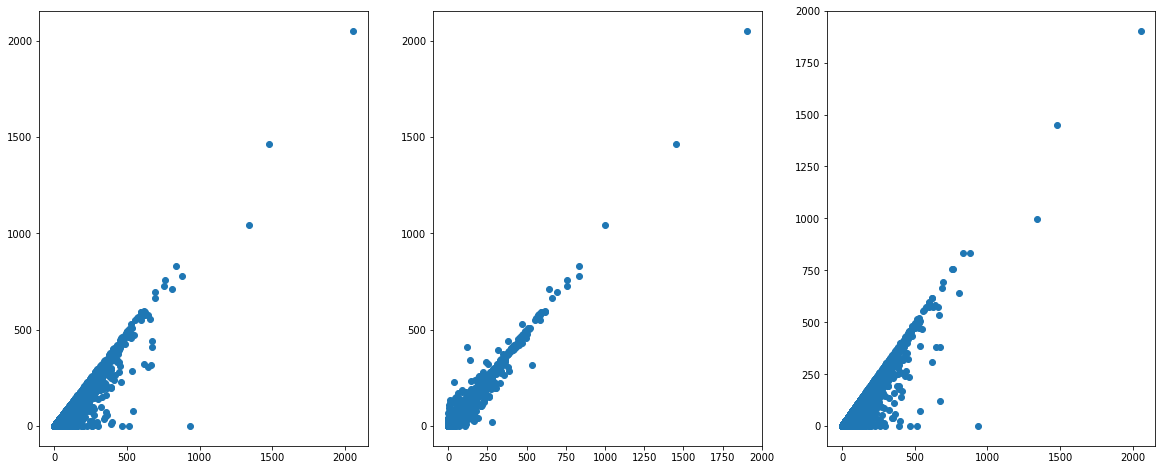

In [46]:
plt.figure(figsize=(20, 8))
plt.subplot(131)
#PVP次数和主动发起PVP次数
plt.scatter(train_pay_7['pvp_battle_count'],train_pay_7['pvp_lanch_count'])
plt.subplot(132)
#PVP胜利次数和主动发起PVP次数
plt.scatter(train_pay_7['pvp_win_count'],train_pay_7['pvp_lanch_count'])
plt.subplot(133)
#PVP次数和PVP胜利次数
plt.scatter(train_pay_7['pvp_battle_count'],train_pay_7['pvp_win_count'])

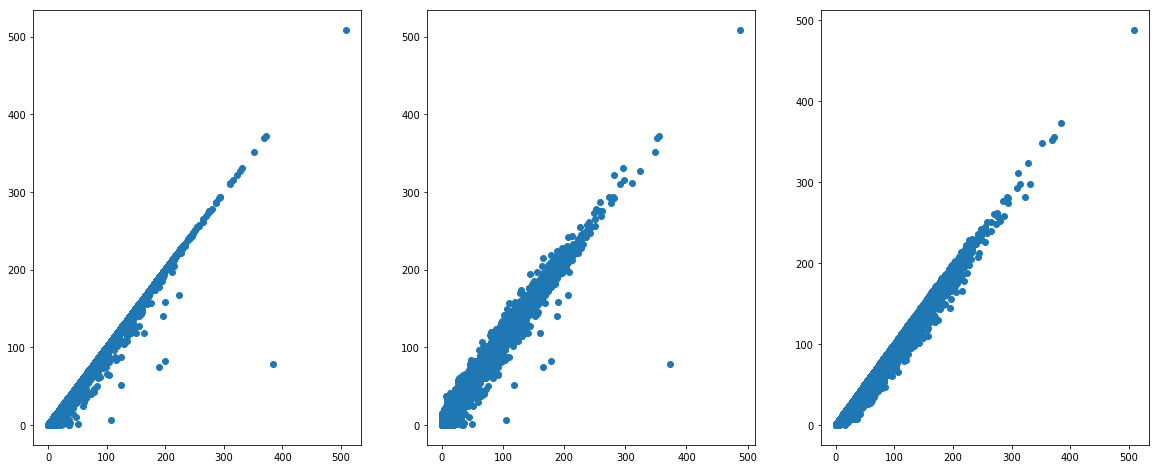

In [47]:
plt.figure(figsize=(20, 8))
plt.subplot(131)
#PVE次数和主动发起PVE次数
plt.scatter(train_pay_7['pve_battle_count'],train_pay_7['pve_lanch_count'])
plt.subplot(132)
#PVP胜利次数和主动发起PVP次数
plt.scatter(train_pay_7['pve_win_count'],train_pay_7['pve_lanch_count'])
plt.subplot(133)
#PVP次数和PVP胜利次数
plt.scatter(train_pay_7['pve_battle_count'],train_pay_7['pve_win_count'])

总结起来，很多变量之间都存在严重的线性关系